In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [133]:
 data = pd.read_csv('diamonds.csv')

In [134]:
del data[data.columns[0]]

In [135]:
data.isnull().values.any()

False

In [136]:
print(data.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [137]:
data.rename(columns={"x": "length", "y": "width", "z" : "depth","depth" : "depth %", "table": "table %"},inplace = True)
data.head(5)

,carat,cut,color,clarity,depth %,table %,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [138]:
data.describe()

,carat,depth %,table %,price,length,width,depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [139]:
# check if any dimensions have zero value in it
print(data.loc[(data['length'] == 0) | (data['width'] == 0) | (data['depth'] == 0) ] )
print('length :',len(data.loc[(data['length'] == 0) | (data['width'] == 0) | (data['depth'] == 0) ]))

       carat        cut color clarity  depth %  table %  price  length  width  \
2207    1.00    Premium     G     SI2     59.1     59.0   3142    6.55   6.48   
2314    1.01    Premium     H      I1     58.1     59.0   3167    6.66   6.60   
4791    1.10    Premium     G     SI2     63.0     59.0   3696    6.50   6.47   
5471    1.01    Premium     F     SI2     59.2     58.0   3837    6.50   6.47   
10167   1.50       Good     G      I1     64.0     61.0   4731    7.15   7.04   
11182   1.07      Ideal     F     SI2     61.6     56.0   4954    0.00   6.62   
11963   1.00  Very Good     H     VS2     63.3     53.0   5139    0.00   0.00   
13601   1.15      Ideal     G     VS2     59.2     56.0   5564    6.88   6.83   
15951   1.14       Fair     G     VS1     57.5     67.0   6381    0.00   0.00   
24394   2.18    Premium     H     SI2     59.4     61.0  12631    8.49   8.45   
24520   1.56      Ideal     G     VS2     62.2     54.0  12800    0.00   0.00   
26123   2.25    Premium     

In [140]:
data[['length','width','depth']]=data[['length','width','depth']].replace(0,np.NaN)
data.dropna(inplace=True)

In [141]:
print(data.loc[(data['length'] == 0) | (data['width'] == 0) | (data['depth'] == 0) ] )
print('length :',len(data.loc[(data['length'] == 0) | (data['width'] == 0) | (data['depth'] == 0) ]))

Empty DataFrame
Columns: [carat, cut, color, clarity, depth %, table %, price, length, width, depth]
Index: []
length : 0


In [142]:
data.loc[(data['length'] == 0) | (data['width'] == 0) | (data['depth'] == 0) ]


,carat,cut,color,clarity,depth %,table %,price,length,width,depth


In [152]:
print(data.isnull().sum())
print('shape:',data.shape)

carat      0
cut        0
color      0
clarity    0
depth %    0
table %    0
price      0
length     0
width      0
depth      0
dtype: int64
shape: (53920, 10)


In [ ]:
cut_labels = data['cut'].unique().tolist()
clarity_labels = data['clarity'].unique().tolist()
color_labels = data['color'].unique().tolist()

{'E': 9797, 'I': 5421, 'J': 2808, 'H': 8298, 'F': 9538, 'G': 11284, 'D': 6774}


Text(0.5, 0.98, 'Colors')

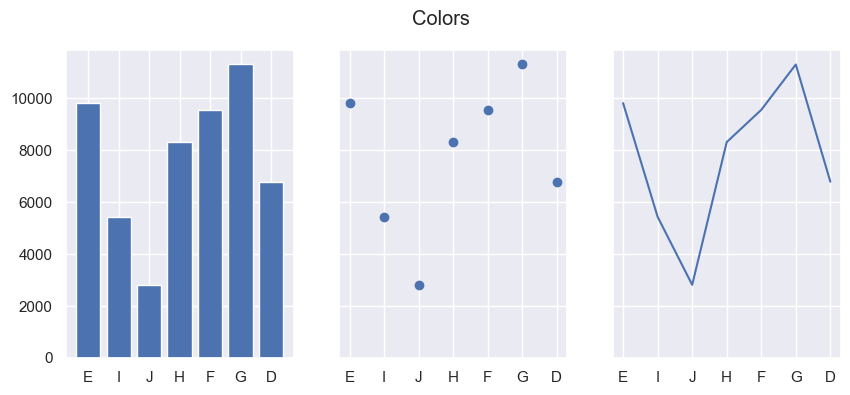

In [169]:



new_data = {}

for color in color_labels:
    length = len(data.loc[(data['color'] == color) ])
    new_data[color] = length                    
print(new_data)                          
names = list(new_data.keys())
values = list(new_data.values())

fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Colors')

{'SI2': 9185, 'SI1': 13063, 'VS1': 8170, 'VS2': 12254, 'VVS2': 5066, 'VVS1': 3654, 'I1': 738, 'IF': 1790}


Text(0.5, 0.98, 'Clarity')

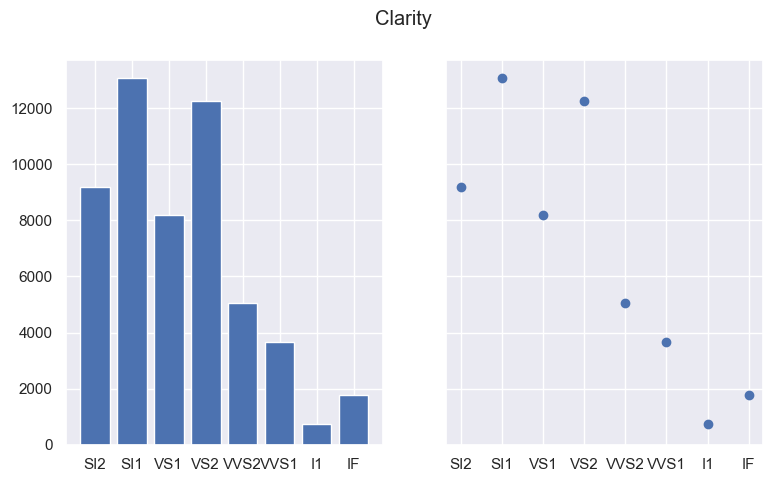

In [170]:
new_data = {}

for clarity in clarity_labels:
    length = len(data.loc[(data['clarity'] == clarity) ])
    new_data[clarity] = length                    
print(new_data)                          
names = list(new_data.keys())
values = list(new_data.values())

fig, axs = plt.subplots(1, 2, figsize=(9, 5), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
fig.suptitle('Clarity')

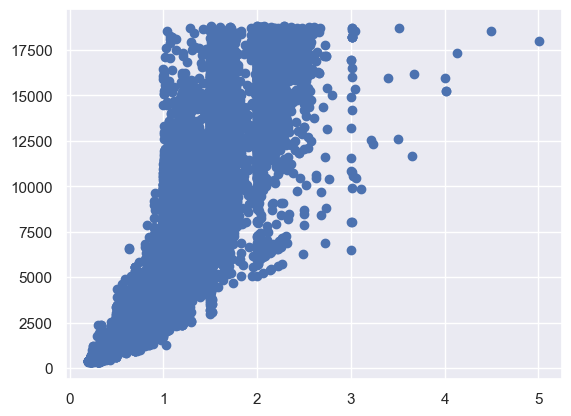

In [171]:

x = data['carat']
y = data['price']
plt.scatter(x, y)
plt.show()

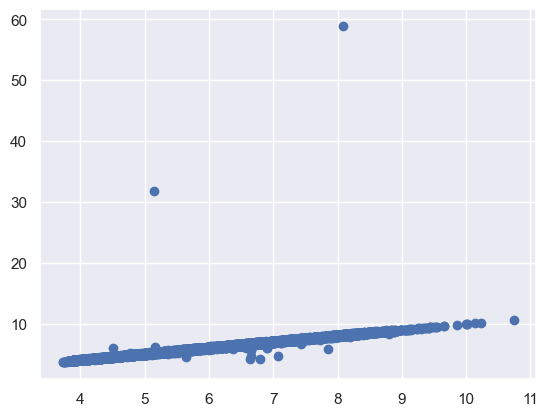

In [172]:
x = data['length']
y = data['width']
plt.scatter(x, y)
plt.show()

<AxesSubplot: xlabel='clarity'>

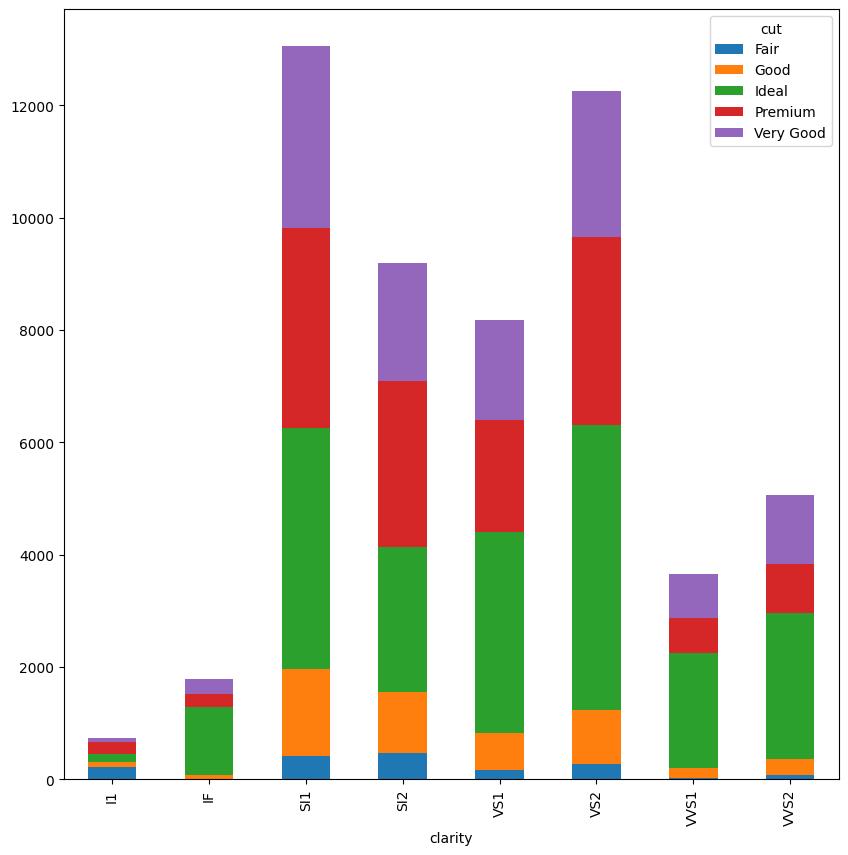

In [86]:
clarity_cut_table = pd.crosstab(index=data["clarity"], columns=data["cut"])

clarity_cut_table.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)

<AxesSubplot: xlabel='color'>

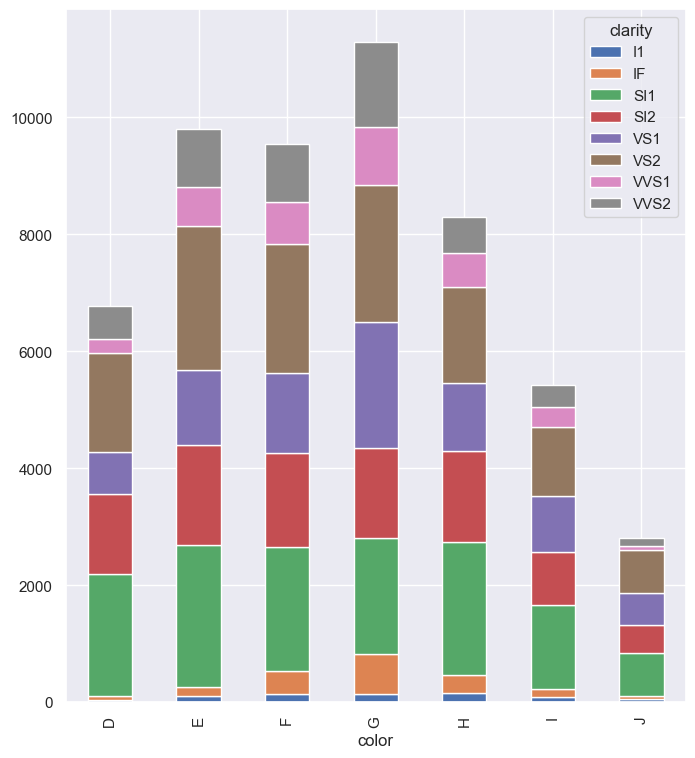

In [173]:
color_clarity_table = pd.crosstab(index=data["color"], columns=data["clarity"])

color_clarity_table.plot(kind="bar", 
                 figsize=(8,9),
                 stacked=True)